In practice, a kernel matrix may be called many times in program, so it is extremely efficient to compute the marginalized graph kernel(MGK) only once and saved, and reuse the saved kernel matrix in the following calculations.

# Load input data set.

In [1]:
from mgktools.data.data import Dataset
dataset = Dataset.load(path='freesolv', filename='dataset.pkl')

# Set marginalized graph kernel(MGK)

In [2]:
from mgktools.kernels.utils import get_kernel_config
from mgktools.hyperparameters import product_msnorm
kernel_config = get_kernel_config(
    dataset,
    graph_kernel_type = 'graph',
    # arguments for marginalized graph kernel
    mgk_hyperparameters_files = [product_msnorm],
)
kernel = kernel_config.kernel

# Compute and save the MGK matrix

In [3]:
from mgktools.kernels.PreComputed import calc_precomputed_kernel_config
dataset.graph_kernel_type = 'graph'
kernel_config = calc_precomputed_kernel_config(kernel_config=kernel_config,
                                               dataset=dataset)
import os, pickle
kernel_pkl = os.path.join('freesolv', 'kernel.pkl')
pickle.dump(kernel_config, open(kernel_pkl, 'wb'), protocol=4)

# Gaussian process regression (GPR)

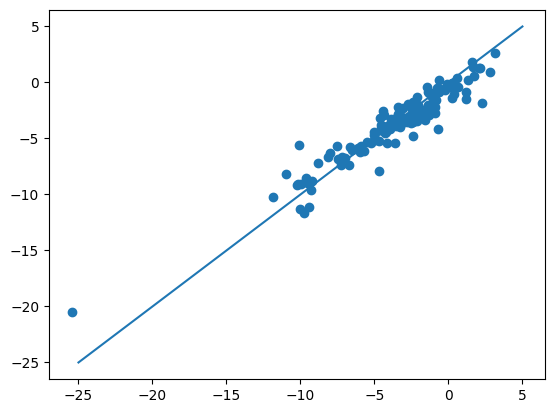

In [4]:
kernel_config = get_kernel_config(
    dataset,
    graph_kernel_type = 'pre-computed',
    # arguments for pre-computed kernel
    kernel_pkl = 'freesolv/kernel.pkl'
)
kernel = kernel_config.kernel

dataset.graph_kernel_type = 'pre-computed'
from mgktools.data import dataset_split
train, test = dataset_split(dataset, 
                            split_type='random',
                            sizes=[0.8, 0.2])
from mgktools.models.regression.GPRgraphdot.gpr import GPR
gpr = GPR(kernel=kernel,
          optimizer=None,
          alpha=0.01,
          normalize_y=True)
gpr.fit(train.X, train.y)
y_pred = gpr.predict(test.X)
import matplotlib.pyplot as plt
plt.scatter(test.y, y_pred)
plt.plot([-25, 5], [-25, 5])